In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pyworld
import pyworld as pw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyworld: filename=pyworld-0.3.4-cp310-cp310-linux_x86_64.whl size=865292 sha256=ad325a946aecc956a7e2cddc50d6c84063aa040b934686ae4054ef04567f9ae9
  Stored in directory: /root/.cache/pip/wheels/66/09/8a/a1d79b73d59756f66e9bfe55a199840efc7473adb76ddacdfd
Successfully built pyworld


In [ ]:
import librosa as lr
import matplotlib.pyplot as plt
import numpy as np

import wave

import IPython.display as disp


データ準備

In [ ]:
# ファイルパス
# /content/drive/MyDrive/Public/プロジェクト配布/FFT/data/zundamon_sample.wav にずんだもんの音声ファイルがあるので、良かったらどうぞ。
filename = '/content/drive/MyDrive/Public/プロジェクト配布/FFT/data/zundamon_sample.wav'

with wave.open(filename,  'rb') as wr:
    ch = wr.getnchannels()
    width = wr.getsampwidth()
    fr = wr.getframerate()
    fn = wr.getnframes()

    print("音声ファイルの情報")
    print("チャンネル: ", ch)
    print("サンプルサイズ: ", width)
    print("サンプリングレート: ", fr)
    print("フレームレート: ", fn)
    print(f'再生時間: {1.0 * fn / fr}秒')

wav, sr = lr.load(filename, sr=None)
t = np.arange(0, len(wav)) / sr

print(f'データ数は{len(wav)}個です。')


音声ファイルの情報
チャンネル:  1
サンプルサイズ:  2
サンプリングレート:  16000
フレームレート:  29355
再生時間: 1.8346875秒
データ数は29355個です。


オリジナルデータのF0抽出

データ数は29355個です。


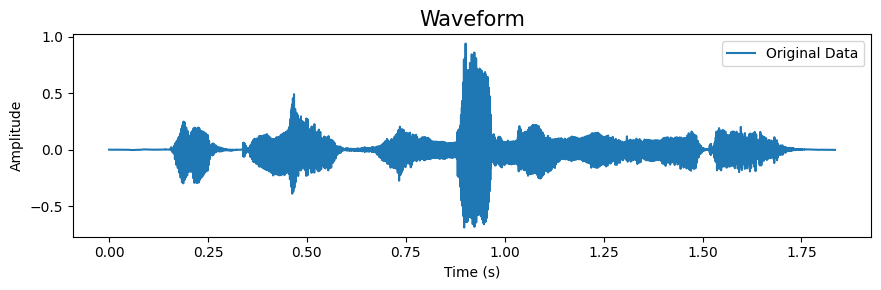

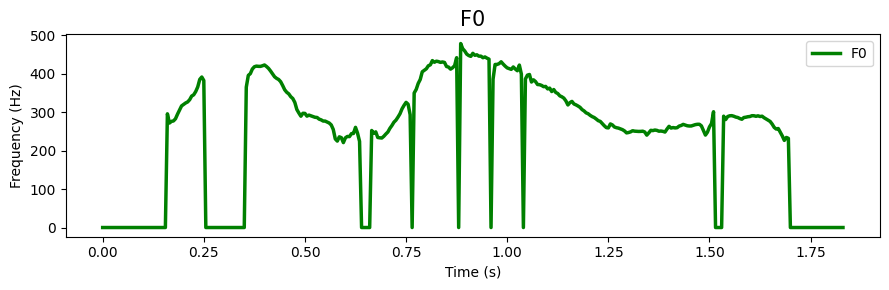

In [ ]:
# パラメーターの設定
wav, sr = lr.load(filename, sr=None)
t = np.arange(0, len(wav)) / sr  # 時間軸の設定
wav = wav.astype(float)  # floatでないとworldは扱えないので注意
_f0, _time = pw.dio(wav, sr)  # 基本周波数の抽出
f0 = pw.stonemask(wav, _f0, _time, sr)  # 基本周波数のスムージング

# DIO による基本周波数推定
f0, timeaxis = pw.dio(wav, sr)

print(f"データ数は{len(wav)}個です。")

# 波形の表示
plt.figure(figsize=(9, 3))
plt.plot(t, wav, label="Original Data")
plt.legend(fontsize=10)
plt.title("Waveform", fontsize=15)
plt.xlabel("Time (s)", fontsize=10)
plt.ylabel("Amplitude", fontsize=10)
plt.tight_layout()
plt.show()

# F0の表示
plt.figure(figsize=(9, 3))
plt.plot(timeaxis, f0, color="green", lw=2.5, label="F0")
plt.legend(fontsize=10)
plt.title("F0", fontsize=15)
plt.xlabel("Time (s)", fontsize=10)
plt.ylabel("Frequency (Hz)", fontsize=10)
plt.tight_layout()
plt.show()

disp.Audio(filename)


時間で区切ったデータのF0抽出

何秒から何秒までの波形を表示しますか？
何秒から >>>1
何秒まで >>>1.2
データ数は3199個です。


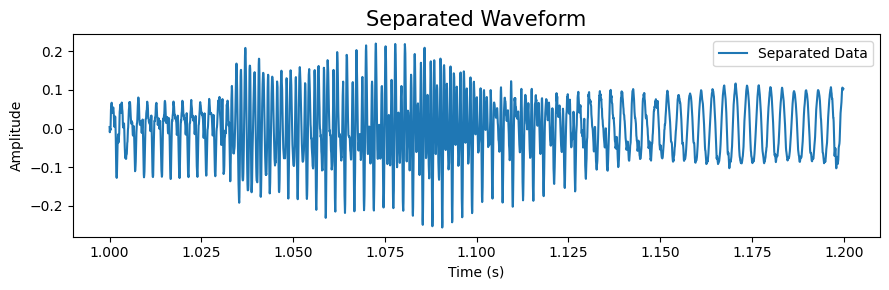

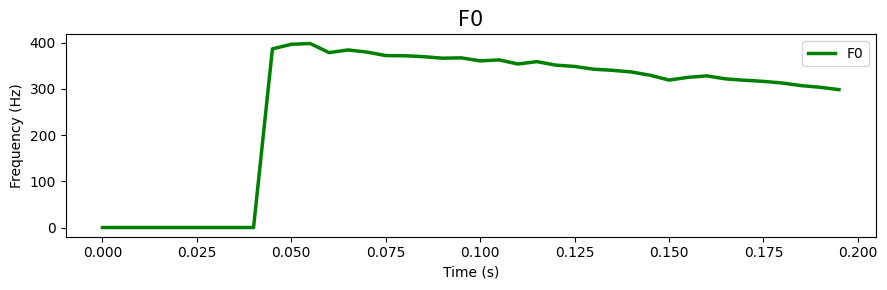

In [ ]:
while True:
    try:
        print('何秒から何秒までの波形を表示しますか？')
        x_lim1 = float(input('何秒から >>>'))
        x_lim2 = float(input('何秒まで >>>'))

        length = x_lim2 - x_lim1
        wav2, sr2 = lr.load(filename, sr=None, offset=x_lim1, duration=length)
        t2 = np.arange(0, len(wav2)) / sr2 + x_lim1
        wav2 = wav2.astype(float)
        _f0_2, _time_2 = pw.dio(wav2, sr2)
        f0_2 = pw.stonemask(wav2, _f0_2, _time_2, sr2)

        # DIO による基本周波数推定
        f0, timeaxis = pw.dio(wav2, sr2)

        print(f'データ数は{len(wav2)}個です。')

        # 波形の表示
        plt.figure(figsize=(9, 3))
        plt.plot(t2, wav2, label='Separated Data')
        plt.legend(fontsize=10)
        plt.title('Separated Waveform', fontsize=15)
        plt.xlabel('Time (s)', fontsize=10)
        plt.ylabel('Amplitude', fontsize=10)
        plt.tight_layout()
        plt.show()

        # F0の表示
        plt.figure(figsize=(9, 3))
        plt.plot(timeaxis, f0, color='green', lw=2.5, label='F0')
        plt.legend(fontsize=10)
        plt.title('F0', fontsize=15)
        plt.xlabel('Time (s)', fontsize=10)
        plt.ylabel('Frequency (Hz)', fontsize=10)
        plt.tight_layout()
        plt.show()
        break
    except ValueError:
        print("無効な値が入力されました。やり直してください。")

disp.Audio(data=wav2, rate=sr2)
